# 1. Introduction
A census is the procedure of systematically acquiring and recording information about the members of a given population.
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

## 1.1  Data description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  The prediction task is to determine whether a person makes over $50K a year.

## 1.2 Features Description
**1. Categorical Attributes**
 * **workclass**:  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * **occupation**:  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * **relationship**:  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * **race**:  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * **sex**:  Female, Male.
 * **native-country**:  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   
  
**2. Continuous Attributes**
 * **age**: continuous.
  -  Age of an individual  
 * **fnlwgt**: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: continuous.
  -  Individual's working hour per week   

## 1.3 Objective of this project
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

# 2. Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold

## Load Data

In [3]:
data = pd.read_csv("../input/adult-census-income/adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

# 3. Data Cleaning

Fixing the common nan values

    Nan values were as ? in data. Hence we fix this with most frequent element(mode) in the entire dataset. It generalizes well, as we will see with the accuracy of our classifiers

In [5]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['native.country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native.country'][data['native.country'] == '?'] = most_freq_attrib 

Lets look the data it again :

In [6]:
# for later use
data_num = data.copy()
data1 = data.copy()
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


# 4. Feature Engineering

Education

    9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
    Create Elementary object for 1st-4th, 5th-6th, 7th-8th

Marital Status

    
    Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
    Divorced, separated again comes under category separated.

Workclass

    Self-emp-not-inc, Self-emp-inc comes under category self employed
    Local-gov,State-gov,Federal-gov comes under category goverment emloyees


In [7]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
data1['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data1['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

data1['education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

In [8]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
data1['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
data1['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data1['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [9]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
data1['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data1['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data1['workclass'].value_counts()

Private           24532
Govt_employees     4351
Self_employed      3657
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

### Deleting the unuseful features and observations

In [10]:
del_cols = ['education.num']
data1.drop(labels = del_cols,axis = 1,inplace = True)

### Updating the columns

In [11]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation','relationship',
               'race', 'sex', 'income']

# 5. Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(data1[num_col_new]),columns = num_col_new).head(5)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,1.000000,0.0,1.000000,0.397959,0.043987
1,0.890411,0.0,1.000000,0.173469,0.081896
2,0.671233,0.0,1.000000,0.397959,0.118021
3,0.506849,0.0,0.895317,0.397959,0.086982
4,0.328767,0.0,0.895317,0.397959,0.171404


In [13]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [14]:
num_df = pipeline.fit_transform(data1)
num_df.shape

(32561, 5)

In [15]:
# columns which I don't need after creating dummy variables dataframe
cols = ['workclass_Govt_employess','education_Some-college',
        'marital-status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [16]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(data1)
cat_df.shape

(32561, 43)

In [17]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [18]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (32561, 49)


## 5.2 Split the dataset¶

In [19]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K','fnlwgt'],axis = 1,inplace = True)
X = final_df

## 5.3 Take a look to Income class distribution

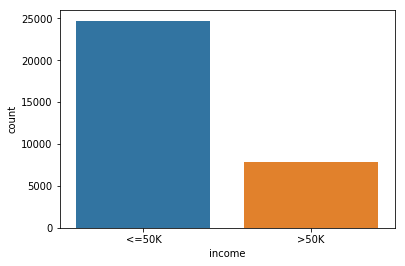

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [20]:
sns.countplot(x="income", data= data)
plt.show()
data["income"].value_counts()

### Implementating model on imbalanced data

In [21]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size =0.15,random_state = 42)
#fitting the model
lr=LogisticRegression()
lr.fit(X_train1,y_train1)
# predict 
y_pred4=lr.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred4))
print("Precision:",metrics.precision_score(y_test1, y_pred4))
print("Recall:",metrics.recall_score(y_test1, y_pred4))
print("F1 score:",metrics.f1_score(y_test1, y_pred4))
print("AUC :",metrics.roc_auc_score(y_test1, y_pred4))

Accuracy: 0.8462640736949847
Precision: 0.8756554307116104
Recall: 0.9327127659574468
F1 score: 0.9032839665164198
AUC : 0.7450230496453901


## 5.4 Resampling

The main idea of sampling classes is to either increasing the samples of the minority class or decreasing the samples of the majority class. This is done in order to obtain a fair balance in the number of instances for both the classes.

There can be two main types of sampling:

    You can add copies of instances from the minority class which is called over-sampling (or more formally sampling with replacement), or
    You can delete instances from the majority class, which is called under-sampling.


A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

**Under-sampling**

Advantages of this approach:

    It can help improve the runtime of the model and solve the memory problems by reducing the number of training data samples when the training data set is enormous.
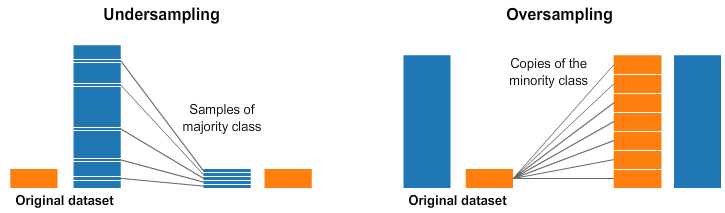

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

Using TensorFlow backend.


In [24]:
X_rus = pd.DataFrame(X_rus)
X_rus.columns = ['education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_elementary_school', 'gender_Female',
       'marital-status_Married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Other',
       'race_White', 'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'workclass_Govt_employees', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self_employed', 'workclass_Without-pay',
       'age', 'capital-gain', 'capital-loss', 'hours-per-week', 'hours']
y_rus = pd.DataFrame(y_rus)
y_rus.columns = ["income"]

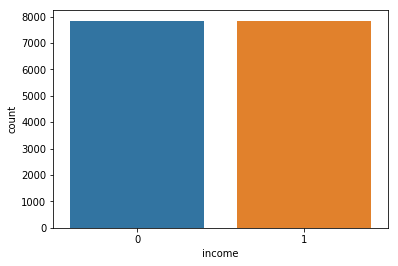

In [25]:
sns.countplot(x=y_rus["income"])
plt.show()


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,test_size =0.15,random_state = 42)

## 5.5 Baseline models

In [27]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [28]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 3
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names,results

In [29]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR: 0.808762 (0.007222)
LDA: 0.801109 (0.005821)
KNN: 0.777552 (0.001363)
CART: 0.762847 (0.008934)
NB: 0.691123 (0.023325)
AB: 0.818815 (0.007858)
GBM: 0.829394 (0.004797)
RF: 0.794807 (0.005701)
ET: 0.780328 (0.003379)


## 5.6 Models Scores

In [30]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame
basedLineScore = ScoreDataFrame(names,results)
basedLineScore.sort_values(by='Score', ascending=False)

,Model,Score
6,GBM,0.8294
5,AB,0.8188
0,LR,0.8088
1,LDA,0.8011
7,RF,0.7948
8,ET,0.7803
2,KNN,0.7776
3,CART,0.7628
4,NB,0.6911


# 6. Tuning Machine Learning Models

## 6.1 Logistic Regression

**Logistic Regression is used when the dependent variable(target) is categorical.**

**Model**

Output = 0 or 1

Hypothesis => Z = WX + B

hΘ(x) = sigmoid (Z)

**Sigmoid Function**
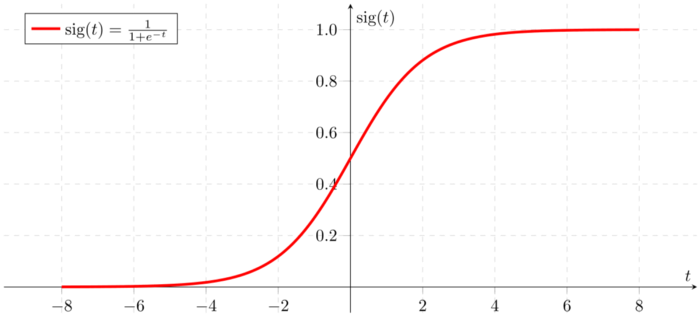

If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.

**Cost Function**
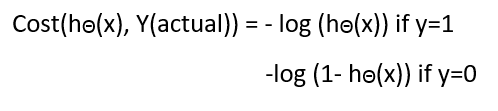

## Hyperparameter Tuning 
A hyperparameter is a parameter whose value is set before the learning process begins.
Tuning Strategies

We will explore two different methods for optimizing hyperparameters:

    Grid Search
    Random Search

### Grid Search vs Random search

**Grid search** is a traditional way to perform hyperparameter optimization. It works by searching exhaustively through a specified subset of hyperparameters.

**Random search** differs from grid search mainly in that it searches the specified subset of hyperparameters randomly instead of exhaustively. The major benefit being decreased processing time.

* There is a tradeoff to decreased processing time, however. We aren’t guaranteed to find the optimal combination of hyperparameters.

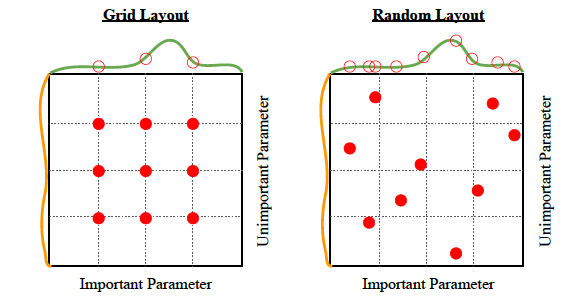

### Grid Search

In [31]:
%%time
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.1,0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'C': 0.4, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1'}
CPU times: user 47.8 s, sys: 28.4 s, total: 1min 16s
Wall time: 30.7 s


**C : Inverse of regularization strength**

we use paramter C as our regularization parameter. Parameter C = 1/λ.

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

* Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

**L2 Regularization or Ridge Regularization**

* Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.
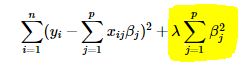

**L1 Regularization or Lasso**

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
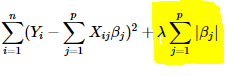

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

**Class weight**

* If we have highly imbalanced classes and have no addressed it during preprocessing, we have the option of using the class_weight parameter to weight the classes to make certain we have a balanced mix of each class. Class weights will be given by n_samples / (n_classes * np.bincount(y))

In [32]:
%%time
#fitting the model
lr1=LogisticRegression(C=0.4, random_state=4 ,penalty='l1', class_weight={0:1,1:1})
lr1.fit(X_train,y_train)
# predict 
y_pred1=lr1.predict(X_test)

CPU times: user 784 ms, sys: 2.32 ms, total: 786 ms
Wall time: 782 ms


### Evaluation of logistic regression(Grid Search)
**Confusion Matrix**

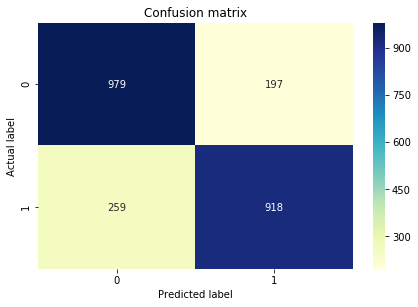

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("F1 score:",metrics.f1_score(y_test, y_pred1))
print("AUC :",metrics.roc_auc_score(y_test, y_pred1))

Accuracy: 0.806204844878878
Precision: 0.8233183856502242
Recall: 0.7799490229396772
F1 score: 0.8010471204188482
AUC : 0.806216008068478


**Precision:**
Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct.
Precision can be thought of as a measure of a classifier's exactness.
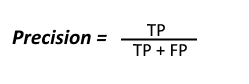

**Recall:**
Out of all the positive classes, how much we predicted correctly. It should be high as possible.
Recall can be thought of as a measure of a classifier's completeness.
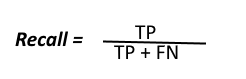

**F1 score**
It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score.

F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.
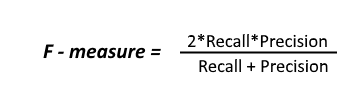

### ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate
    False Positive Rate
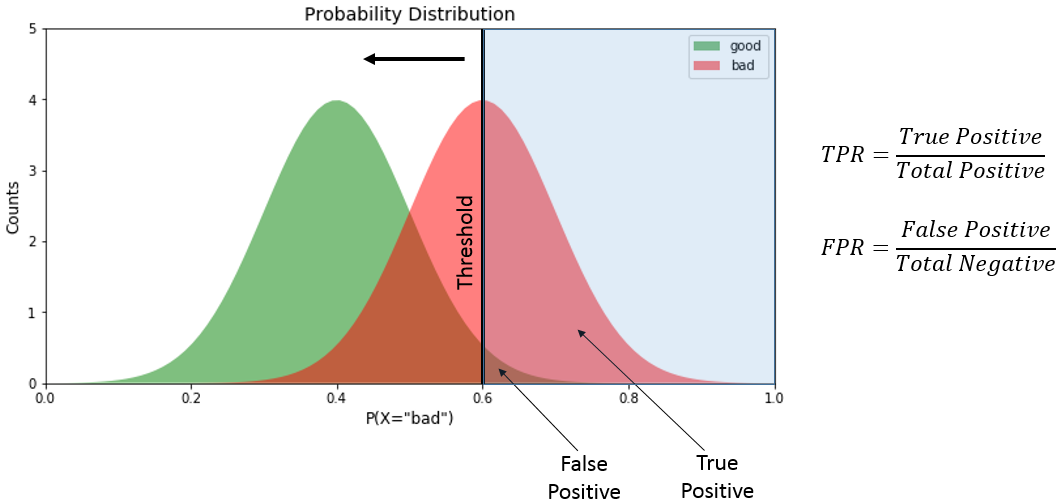

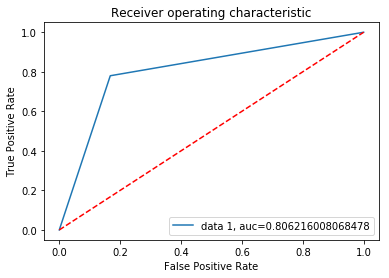

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

### Random search

In [36]:
%%time
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.1,0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}
CV_rfc = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv= 5,random_state=1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)


{'penalty': 'l2', 'class_weight': {0: 1, 1: 1}, 'C': 0.3}
CPU times: user 12.5 s, sys: 8.17 s, total: 20.7 s
Wall time: 7.8 s


In [37]:
%%time
#fitting the model
lr2=LogisticRegression(C=0.3, random_state=4 ,penalty='l2', class_weight={0:1,1:1})
lr2.fit(X_train,y_train)
# predict 
y_pred2=lr2.predict(X_test)

CPU times: user 56.4 ms, sys: 726 µs, total: 57.2 ms
Wall time: 55.6 ms


### Evaluation of logistic regression(Random Search)

#### Confusion Matrix

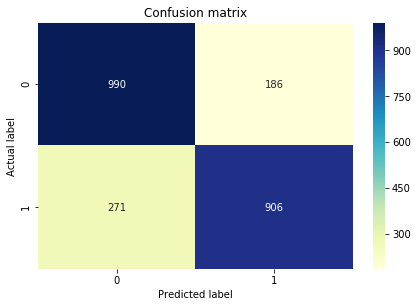

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("F1 score:",metrics.f1_score(y_test, y_pred2))
print("AUC :",metrics.roc_auc_score(y_test, y_pred2))

Accuracy: 0.8057798555036124
Precision: 0.8296703296703297
Recall: 0.7697536108751062
F1 score: 0.7985896870868223
AUC : 0.8057951727844919


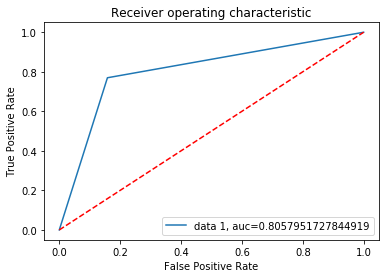

In [40]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## Recursive Feature Elimination

* The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. 
* It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
* As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.
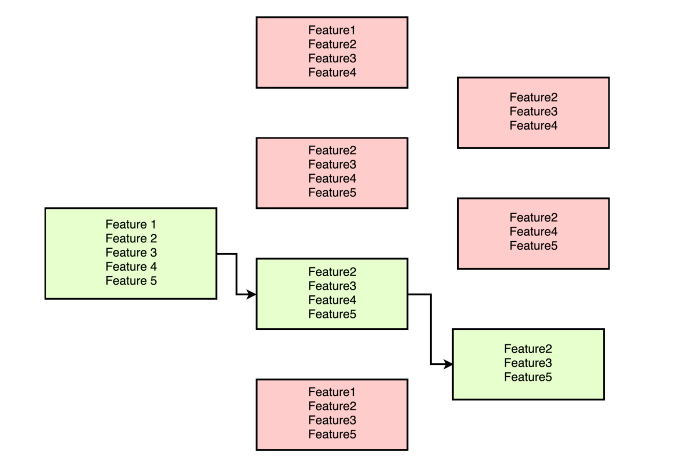

In [41]:
%%time
from sklearn.feature_selection import RFE

# feature extraction
lr = LogisticRegression()
rfe = RFE(lr, 15)
lr3 = rfe.fit(X_train, y_train)

print("Num Features: ", lr3.n_features_)
print("Selected Features: ",  lr3.support_)
print("Feature Ranking: ", lr3.ranking_)

Num Features:  15
Selected Features:  [False False  True  True False  True  True  True  True False False False
 False False False False False  True False False False False False False
 False False False False False False False  True  True  True  True False
 False False False False False False  True  True  True  True]
Feature Ranking:  [22 30  1  1 15  1  1  1  1 31  9 16 17 12 32 13  3  1 27 21  2 10  8 11
  7 14 20 28 18 29 23  1  1  1  1  4  5 26 19 25 24  6  1  1  1  1]
CPU times: user 1.74 s, sys: 41.8 ms, total: 1.78 s
Wall time: 1.71 s


**Features sorted by their rank:**

In [42]:
feature = list(X_train.columns.values) 
print(sorted(zip(map(lambda x: round(x, 4), lr3.ranking_), feature)))


[(1, 'capital-gain'), (1, 'capital-loss'), (1, 'education_Bachelors'), (1, 'education_Doctorate'), (1, 'education_Masters'), (1, 'education_Preschool'), (1, 'education_Prof-school'), (1, 'education_elementary_school'), (1, 'hours'), (1, 'hours-per-week'), (1, 'occupation_Farming-fishing'), (1, 'relationship_Not-in-family'), (1, 'relationship_Other-relative'), (1, 'relationship_Own-child'), (1, 'relationship_Unmarried'), (2, 'occupation_Priv-house-serv'), (3, 'occupation_Exec-managerial'), (4, 'relationship_Wife'), (5, 'workclass_Govt_employees'), (6, 'age'), (7, 'occupation_Tech-support'), (8, 'occupation_Protective-serv'), (9, 'marital-status_Married'), (10, 'occupation_Prof-specialty'), (11, 'occupation_Sales'), (12, 'occupation_Adm-clerical'), (13, 'occupation_Craft-repair'), (14, 'occupation_Transport-moving'), (15, 'education_HS-grad'), (16, 'marital-status_Separated'), (17, 'marital-status_Widowed'), (18, 'race_Other'), (19, 'workclass_Private'), (20, 'race_Amer-Indian-Eskimo'), 

In [43]:

X_train_f = X_train[['age','capital-gain','capital-loss','education_Bachelors','education_Doctorate','education_Masters',
                     'education_Preschool','education_Prof-school','education_elementary_school',
                     'hours-per-week','occupation_Priv-house-serv','relationship_Not-in-family','relationship_Other-relative'
                     ,'relationship_Own-child','relationship_Unmarried']]

X_test_f = X_test[['age','capital-gain','capital-loss','education_Bachelors','education_Doctorate','education_Masters',
                     'education_Preschool','education_Prof-school','education_elementary_school',
                     'hours-per-week','occupation_Priv-house-serv','relationship_Not-in-family','relationship_Other-relative'
                     ,'relationship_Own-child','relationship_Unmarried']]

lr4=LogisticRegression(C=0.4, random_state=4 ,penalty='l2', class_weight={0:1,1:1})
%time lr4.fit(X_train_f,y_train)

CPU times: user 27.6 ms, sys: 1.87 ms, total: 29.5 ms
Wall time: 28.5 ms


LogisticRegression(C=0.4, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=4, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

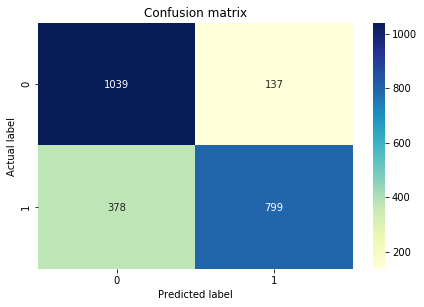

Accuracy: 0.7811304717382066
Precision: 0.8536324786324786
Recall: 0.6788445199660152
F1 score: 0.7562707051585423
AUC : 0.7811739606632797


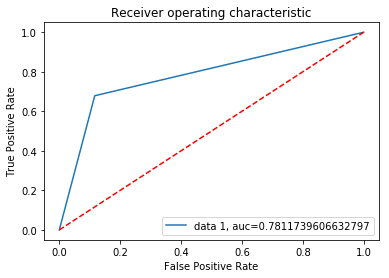

In [44]:
# predict 
y_pred4=lr4.predict(X_test_f)
cf_matrix = confusion_matrix(y_test, y_pred4)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))
print("F1 score:",metrics.f1_score(y_test, y_pred4))
print("AUC :",metrics.roc_auc_score(y_test, y_pred4))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred4)
auc = metrics.roc_auc_score(y_test, y_pred4)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## PCA analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In this case we will use it to analyse the feature importanace

<BarContainer object of 39 artists>

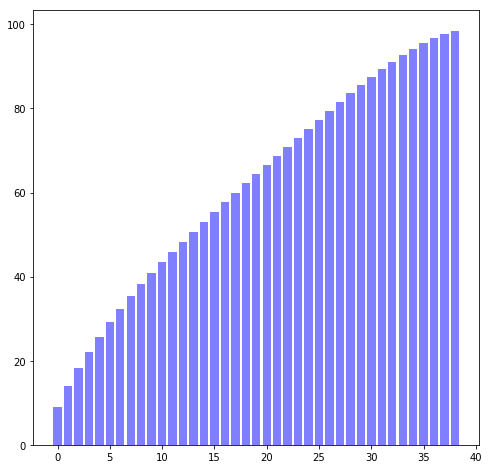

In [45]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)


from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=39)
Y_sklearn = sklearn_pca.fit_transform(X_std)

cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(39), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)

Text(0, 0.5, 'Cumulative explained variance')

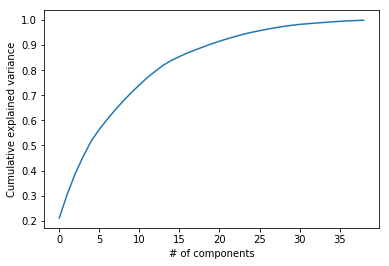

In [46]:
#Cumulative explained variance
from sklearn.decomposition import PCA
pca = PCA(39)
pca_full = pca.fit(X)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

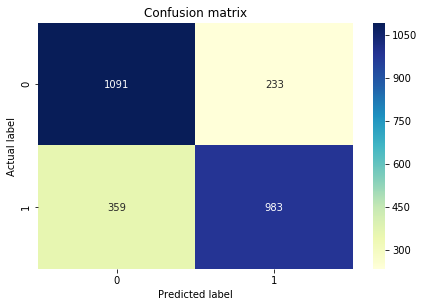

Accuracy: 0.7779444861215303
Precision: 0.8083881578947368
Recall: 0.732488822652757
F1 score: 0.7685691946833465
AUC : 0.7782534747704873


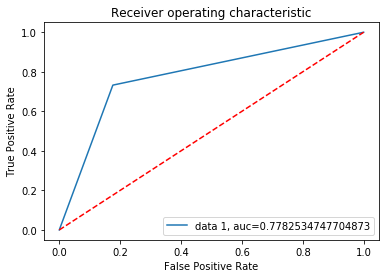

CPU times: user 1.3 s, sys: 1.13 s, total: 2.43 s
Wall time: 692 ms


In [47]:
%%time
# 26 Principal Components seems good 
pca = PCA(n_components=26)
X_transformed = pca.fit_transform(X_train)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_transformed, y_train, test_size=0.2, random_state=13)

lr5=LogisticRegression(C=0.4, random_state=4 ,penalty='l1', class_weight={0:1,1:1})
lr5.fit(X_train_pca, y_train_pca)

# predict 
y_pred =lr5.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test_pca, y_pred))
print("Precision:",metrics.precision_score(y_test_pca, y_pred))
print("Recall:",metrics.recall_score(y_test_pca, y_pred))
print("F1 score:",metrics.f1_score(y_test_pca, y_pred))
print("AUC :",metrics.roc_auc_score(y_test_pca, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test_pca,  y_pred)
auc = metrics.roc_auc_score(y_test_pca, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Feature Importance

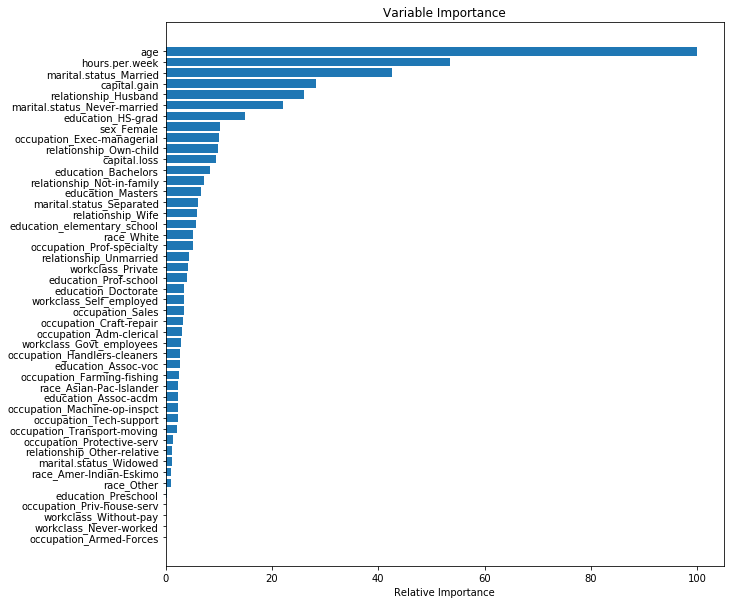

In [48]:
data1 = pd.DataFrame(X,y)

clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=2)

clf.fit(X_train, y_train)


# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
X_train_ef = X_train[['race_Asian-Pac-Islander','education_Assoc-voc', 'workclass_Govt_employees','occupation_Craft-repair',
       'education_Doctorate','workclass_Self_employed', 'occupation_Adm-clerical','occupation_Sales', 'education_Prof-school',
       'workclass_Private','race_White', 'occupation_Prof-specialty', 'relationship_Unmarried','marital-status_Separated', 'education_elementary_school',
       'education_Masters', 'relationship_Wife', 'education_Bachelors','capital-loss', 'occupation_Exec-managerial', 'gender_Female',
       'relationship_Not-in-family', 'education_HS-grad','relationship_Own-child', 'capital-gain', 'relationship_Husband',
       'marital-status_Married', 'hours-per-week', 'age']]
                      
X_test_ef = X_test[['race_Asian-Pac-Islander','education_Assoc-voc', 'workclass_Govt_employees',
       'occupation_Craft-repair', 'education_Doctorate','workclass_Self_employed', 'occupation_Adm-clerical',
       'occupation_Sales', 'education_Prof-school', 'workclass_Private','race_White', 'occupation_Prof-specialty', 'relationship_Unmarried',
       'marital-status_Separated', 'education_elementary_school','education_Masters', 'relationship_Wife', 'education_Bachelors',
       'capital-loss', 'occupation_Exec-managerial', 'gender_Female','relationship_Not-in-family', 'education_HS-grad',
       'relationship_Own-child', 'capital-gain', 'relationship_Husband','marital-status_Married', 'hours-per-week', 'age']]

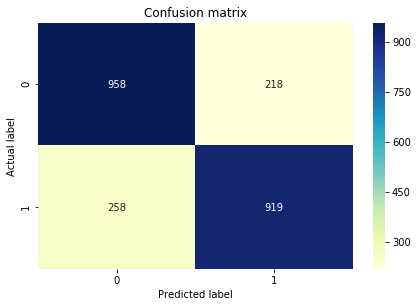

Accuracy: 0.7977050573735657
Precision: 0.8082673702726473
Recall: 0.7807986406117248
F1 score: 0.7942955920484011
AUC : 0.7977122454759304


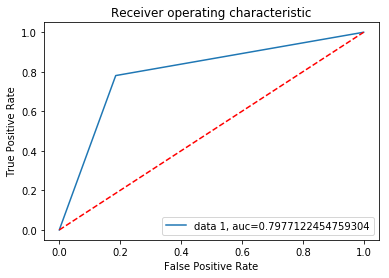

CPU times: user 1.47 s, sys: 910 ms, total: 2.38 s
Wall time: 922 ms


In [50]:
%%time
lr5=LogisticRegression(C=0.4, random_state=4 ,penalty='l1', class_weight={0:1,1:1})
lr5.fit(X_train_ef, y_train)

# predict 
y_pred =lr5.predict(X_test_ef)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("AUC :",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

### Grid Search

In [51]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def Best_Model_Predict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

### Random Search

In [52]:
from scipy.stats import uniform

class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def Best_Model_Predict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

# 6.2 KNN

**kNN is non-parametric, instance based, lazy algorithm and used in the supervised setting.**

* Non-parametric :
      
      It means that algorithm has no pre assumptions about the functional form of the model, to avoid mismodeling .

* Instance based :
      
      It means that our algorithm does not explicitly learn a model.
      Instead, it memorize the training instances which are subsequently used as “knowledge” for the prediction.

* Lazy algorithm :

      It means that it does not use the training data for the Generalization i.e. these algorithm has no explicit training phase or it is minimal. Training is very fast.
      
**kNN Algorithm for Classification**

Training element {xi, yi} , Testing point(x)

    Compute the Distance D(x,xi) to every training element xi.
    Select k closest instance xi1,xi2,…….., xik and their labels yi1, yi2 …, yik.
    Output the class y* which is most frequent in yi1,yi2 ……yik.
    


**Significant of “k”**

    Value of k has strong effect on kNN performance.
    k act as controller to decide the shape of decision boundary.
    Large value of k has following properties:

 1. Smoother decision boundary
 2. It provide more voters for prediction, it implies less affect from outliers.
 3. As a result has Lower Variance and High Bias.
 
 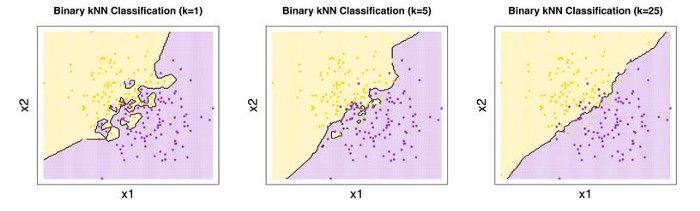
 
**How to Select k**

    The simplest solution is Cross Validation.
    Best method is to try many k values and use Cross-Validation to see which k value is giving the best result.


In [53]:
%%time
k_range = list(range(2,15))
d_metric = ['euclidean','minkowski']

param_grid = dict(n_neighbors = k_range, metric =d_metric)

knn = KNeighborsClassifier()

KNN_GridSearch = GridSearch(X_train_f, y_train, knn ,param_grid)
y_pred = KNN_GridSearch.Best_Model_Predict(X_test_f)

Best: 0.796009 using {'metric': 'euclidean', 'n_neighbors': 12}
CPU times: user 1.93 s, sys: 248 ms, total: 2.18 s
Wall time: 51.2 s


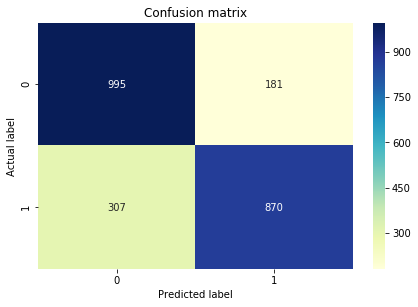

Accuracy: 0.7926051848703782
Precision: 0.8277830637488106
Recall: 0.7391673746813934
F1 score: 0.7809694793536804
AUC : 0.7926279050277716


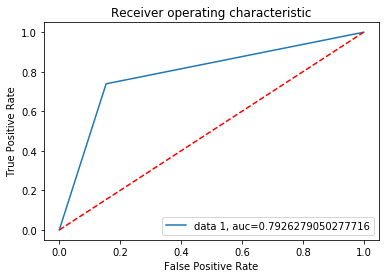

In [54]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("AUC :",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# 6.3 SVM (Support Vector Machine)

**What is a Support Vector Machine**
A Support Vector Machine is a supervised machine learning algorithm which can be used for both classification and regression problems. It follows a technique called the kernel trick to transform the data and based on these transformations, it finds an optimal boundary between the possible outputs.

**How does it work?**
The main idea is to identify the optimal separating hyperplane which maximizes the margin of the training data. 

The goal of SVMs is to find the optimal hyperplane because it not only classifies the existing dataset but also helps predict the class of the unseen data. And the optimal hyperplane is the one which has the biggest margin.

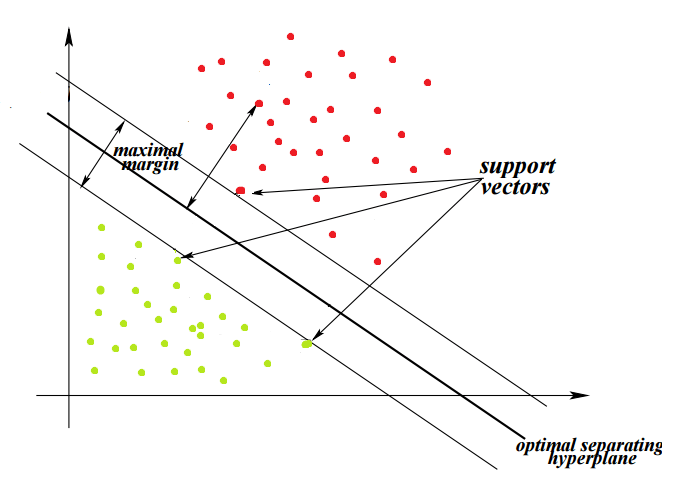

In [55]:
%%time
param_grid = [{'gamma': [ 0.1, 1, 10],'C': [ 0.10, 10, 100]}]

svm = SVC()

svm_GridSearch = GridSearch(X_train_f, y_train, svm,param_grid )
y_pred = svm_GridSearch.Best_Model_Predict(X_test_f)


Best: 0.804186 using {'C': 100, 'gamma': 1}
CPU times: user 27.8 s, sys: 338 ms, total: 28.1 s
Wall time: 9min 17s


**Kernel**

kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane.

**gamma**

gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set.  Increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data.

**C**

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.
A smaller C value leads to a wider street but more margin violations

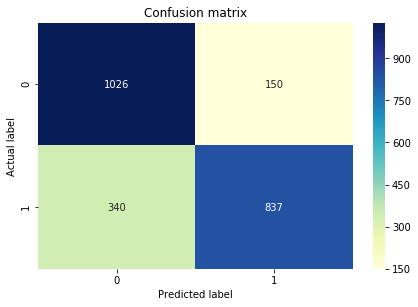

Accuracy: 0.791755206119847
Precision: 0.8480243161094225
Recall: 0.7111299915038233
F1 score: 0.7735674676524953
AUC : 0.7917894855478299


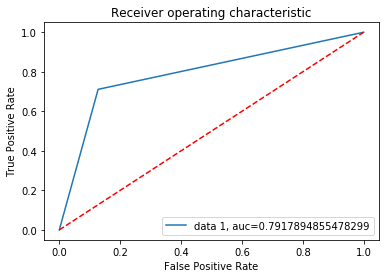

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("AUC :",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# 6.4 LDA

* Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. 

* The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

In general, dimensionality reduction does not only help reducing computational costs for a given classification task, but it can also be helpful to avoid overfitting by minimizing the error in parameter estimation (“curse of dimensionality”).

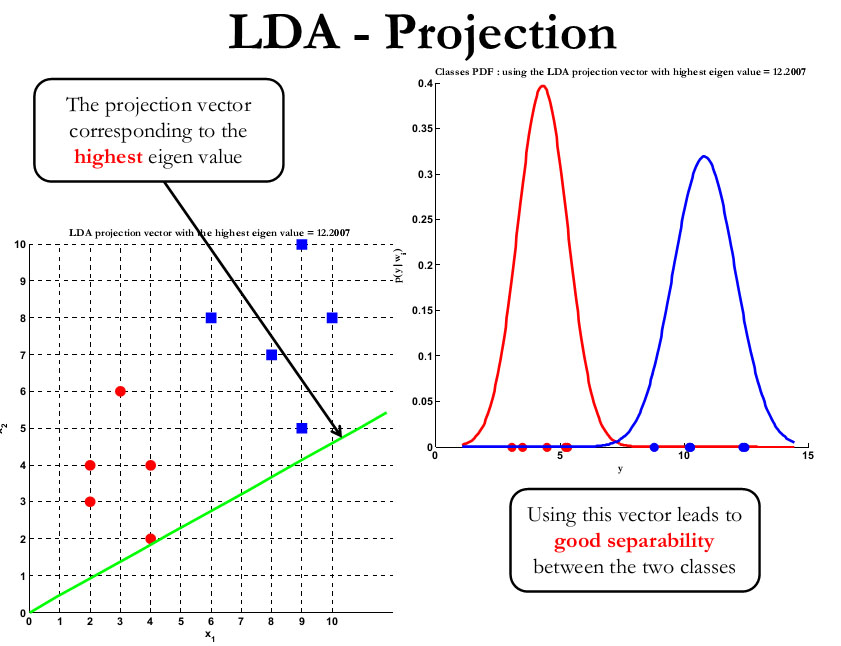

In [57]:
%%time
param_grid = [{'n_components': [1,2,3,4]}]

lda = LinearDiscriminantAnalysis()

lda_GridSearch = GridSearch(X_train, y_train, lda , param_grid )
y_pred = lda_GridSearch.Best_Model_Predict(X_test)

Best: 0.799460 using {'n_components': 1}
CPU times: user 446 ms, sys: 160 ms, total: 606 ms
Wall time: 5.08 s


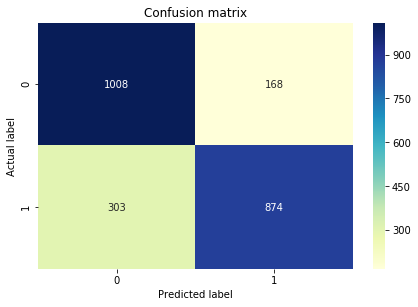

Accuracy: 0.7998300042498937
Precision: 0.8387715930902111
Recall: 0.7425658453695837
F1 score: 0.7877422262280307
AUC : 0.7998543512562205


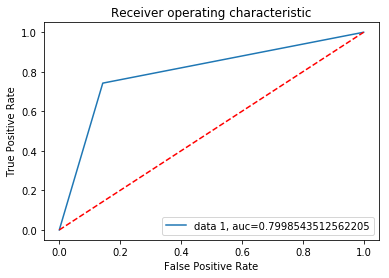

In [58]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("AUC :",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# 6.5 Decision Tree

**Introduction to Decision Trees**

* A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

**How does Decision Tree works ?**

* Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

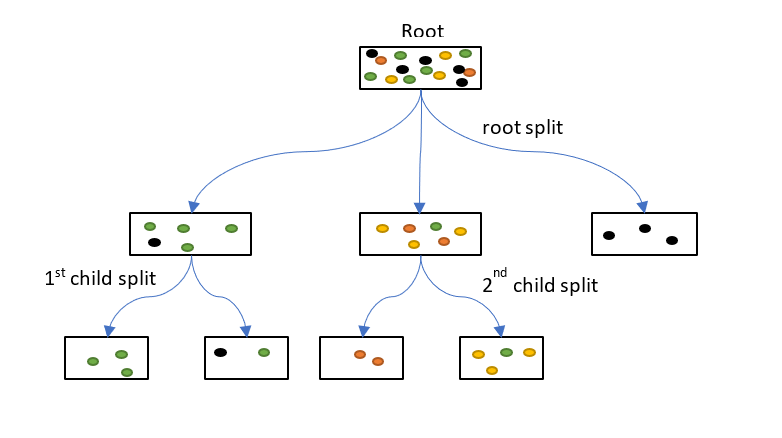

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree. 

**The popular attribute selection measures:**

    Information gain
    Gini index


**Advantages of CART**

    Simple to understand, interpret, visualize.
    Decision trees implicitly perform variable screening or feature selection.
    Can handle both numerical and categorical data. Can also handle multi-output problems.
    Decision trees require relatively little effort from users for data preparation.
    Nonlinear relationships between parameters do not affect tree performance.
    
**Disadvantages of CART**

    Decision-tree learners can create over-complex trees that do not generalize the data well.This is called overfitting.
    Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.

### Implemention of Decision Tree

In [59]:
%%time
from scipy.stats import randint
max_depth_value = [4, 5,6,7,8,9,10,11,12,13]
max_features_value =  randint(1, 7)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

CART = DecisionTreeClassifier(random_state=1)

CART_RandSearch = RandomSearch(X_train_f, y_train, CART, param_grid)
Prediction_CART = CART_RandSearch.Best_Model_Predict(X_test_f)


Best: 0.800660 using {'criterion': 'entropy', 'max_depth': 13, 'max_features': 6, 'min_samples_leaf': 1}
CPU times: user 1.85 s, sys: 263 ms, total: 2.11 s
Wall time: 8.01 s


####  How does a tree decide where to split?

Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

Let’s look at the two most commonly used algorithms in decision tree:

#### Gini:

Gini  says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.
Steps to Calculate Gini for a split

    Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p^2+q^2).
    Calculate Gini for split using weighted Gini score of each node of that split

Example: – Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). 

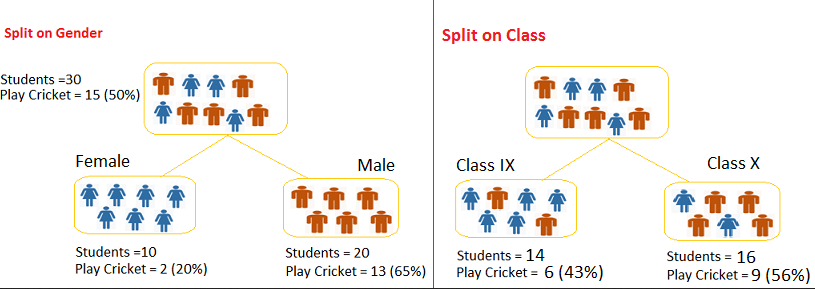
Split on Gender:

    Calculate, Gini for sub-node Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68
    Gini for sub-node Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55
    Calculate weighted Gini for Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59

Similar for Split on Class:

    Gini for sub-node Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51
    Gini for sub-node Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51
    Calculate weighted Gini for Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51

Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender.

#### Information Gain:

Information gain can be understood as decrease in “uncertainty” of the result.
 
Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one.

Entropy can be calculated using formula:-
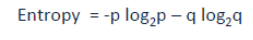

Here p and q is probability of success and failure respectively in that node. Entropy is also used with categorical target variable. It chooses the split which has lowest entropy compared to parent node and other splits. The lesser the entropy, the better it is.

Steps to calculate entropy for a split:

    Calculate entropy of parent node
    Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split.

Example: Let’s use this method to identify best split for student example.

    Entropy for parent node = -(15/30) log2 (15/30) – (15/30) log2 (15/30) = 1. Here 1 shows that it is a impure node.
    Entropy for Female node = -(2/10) log2 (2/10) – (8/10) log2 (8/10) = 0.72 and for male node,  -(13/20) log2 (13/20) – (7/20) log2 (7/20) = 0.93
    Entropy for split Gender = Weighted entropy of sub-nodes = (10/30)*0.72 + (20/30)*0.93 = 0.86
    Entropy for Class IX node, -(6/14) log2 (6/14) – (8/14) log2 (8/14) = 0.99 and for Class X node,  -(9/16) log2 (9/16) – (7/16) log2 (7/16) = 0.99.
    Entropy for split Class =  (14/30)*0.99 + (16/30)*0.99 = 0.99

Above, you can see that entropy for Split on Gender is the lowest among all, so the tree will split on Gender. We can derive information gain from entropy as 1- Entropy.

## Visualize Decision Tree

In [62]:
!pip install pydotplus

^C


In [63]:
# Visualize Decision Tree
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image 

feature_names = [i for i in X_train_f.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == 1] = "1"
y_train_str[y_train_str == 0] ="0"
y_train_str = y_train_str.values

model_1 = tree.DecisionTreeClassifier(criterion='gini', max_depth= 13, max_features= 2, min_samples_leaf= 2) 
model_1.fit(X_train_f, y_train)

from sklearn.externals.six import StringIO
# Let's give dot_data some space so it will not feel nervous any more
dot_data = StringIO()
tree.export_graphviz(model_1, out_file=dot_data,filled=True)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in path
Image(graph.create_png())

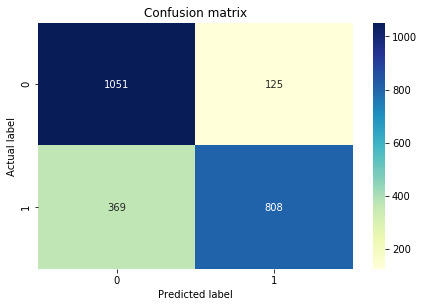

Accuracy: 0.7900552486187845
Precision: 0.8660235798499464
Recall: 0.6864910790144435
F1 score: 0.7658767772511849
AUC : 0.7900992810038204


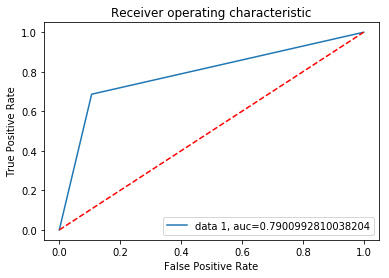

In [64]:
cf_matrix = confusion_matrix(y_test, Prediction_CART)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, Prediction_CART))
print("Precision:",metrics.precision_score(y_test, Prediction_CART))
print("Recall:",metrics.recall_score(y_test, Prediction_CART))
print("F1 score:",metrics.f1_score(y_test, Prediction_CART))
print("AUC :",metrics.roc_auc_score(y_test, Prediction_CART))

fpr, tpr, _ = metrics.roc_curve(y_test,  Prediction_CART)
auc = metrics.roc_auc_score(y_test, Prediction_CART)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# 6.6 Ensemble methods

**What is an ensemble method?**

Ensemble is a Machine Learning concept in which the idea is to train multiple models using the same learning algorithm. The ensembles take part in a bigger group of methods, called multiclassifiers, where a set of hundreds or thousands of learners with a common objective are fused together to solve the problem.
When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are noise, variance, and bias. Ensemble helps to reduce these factors (except noise, which is irreducible error).

**Techniques to perform ensemble decision trees:**

**1. Bagging**

Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier.

Bagging Steps:

    Suppose there are N observations and M features in training data set. A sample from training data set is taken randomly with replacement.
    A subset of M features are selected randomly and whichever feature gives the best split is used to split the node iteratively.
    The tree is grown to the largest.
    Above steps are repeated n times and prediction is given based on the aggregation of predictions from n number of trees.

Advantages:

    Reduces over-fitting of the model.
    Handles higher dimensionality data very well.
    Maintains accuracy for missing data.

Disadvantages:

    Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the classification and regression model.
    
 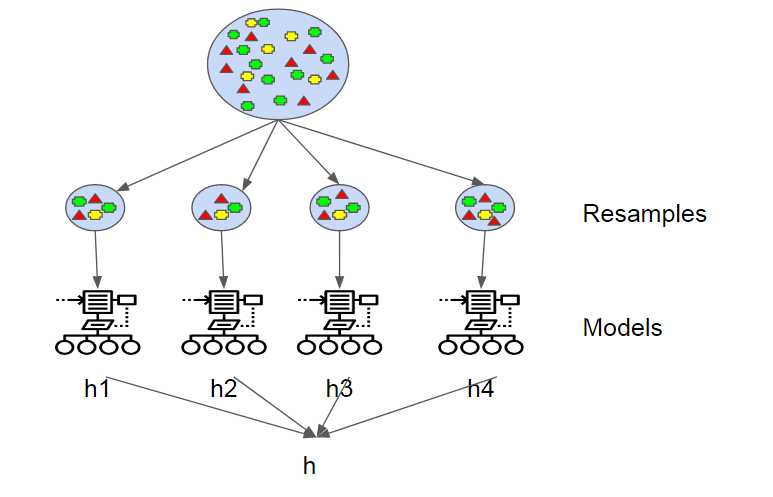


**2. Boosting**

Boosting is used to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analysing data for errors. Consecutive trees (random sample) are fit and at every step, the goal is to improve the accuracy from the prior tree. When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. This process converts weak learners into better performing model.

Boosting Steps:

    Draw a random subset of training samples d1 without replacement from the training set D to train a weak learner C1
    Draw second random training subset d2 without replacement from the training set and add 50 percent of the samples that were previously falsely classified/misclassified to train a weak learner C2
    Find the training samples d3 in the training set D on which C1 and C2 disagree to train a third weak learner C3
    Combine all the weak learners via majority voting.

Advantages:

    Supports different loss function (we have used ‘binary:logistic’ for this example).
    Works well with interactions.

Disadvantages:

    Prone to over-fitting.
    Requires careful tuning of different hyper-parameters.

*     Bagging to decrease the model’s variance;
*     Boosting to decreasing the model’s bias, and;
*     Stacking to increasing the predictive force of the classifier.

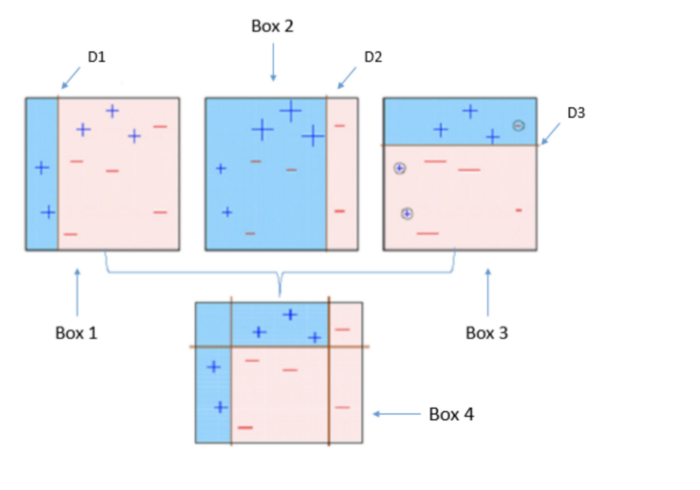

## 6.6.1 Bagging

# 6.6.1.1 Random Forest


In [65]:
%%time
param_grid = [
{'n_estimators': [10, 25,30], 'max_features': ['auto', 'sqrt', 'log2', None], 
 'max_depth': [10, 20, None], 'bootstrap': [True, False]}
]

rf = RandomForestClassifier()

rf_GridSearch = GridSearch(X_train, y_train, rf ,param_grid )
y_pred = rf_GridSearch.Best_Model_Predict(X_test)

Best: 0.818066 using {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}
CPU times: user 4.45 s, sys: 413 ms, total: 4.86 s
Wall time: 2min 21s


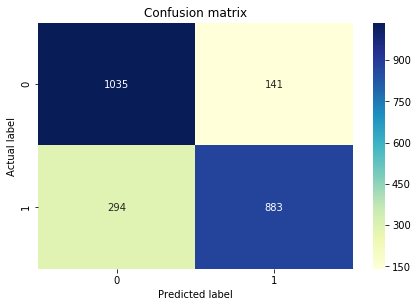

Accuracy: 0.815129621759456
Precision: 0.8623046875
Recall: 0.7502124044180118
F1 score: 0.8023625624716038
AUC : 0.8151572226171692


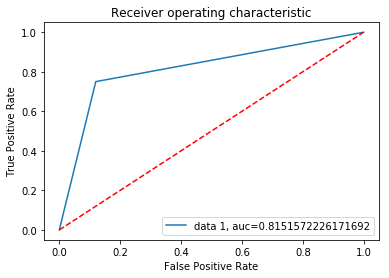

In [66]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("AUC :",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

**Set of hyperparameters:**

*     n_estimators = number of trees in the foreset
*     max_features = max number of features considered for splitting a node
*     max_depth = max number of levels in each decision tree
*     bootstrap = method for sampling data points (with or without replacement)


**max_features:** 

These are the maximum number of features Random Forest is allowed to try in individual tree. 

1)Auto : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree.

2)sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree.

3)log2:It is another option which takes log to the base 2 of the features input.

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

**n_estimators :** 

This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

**min_sample_leaf:** 

Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.

In [67]:
%%time
param_grid = [
{'n_estimators': [10, 25,30], 'max_features': ['auto', 'sqrt', 'log2', None], 
 'max_depth': [10, 20, None], 'bootstrap': [True, False]}
]

rf = RandomForestClassifier()

rf_GridSearch = GridSearch(X_train_ef, y_train, rf ,param_grid )
y_pred = rf_GridSearch.Best_Model_Predict(X_test_ef)

Best: 0.816190 using {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
CPU times: user 4.83 s, sys: 401 ms, total: 5.23 s
Wall time: 1min 48s


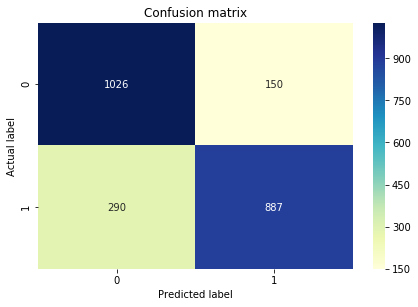

Accuracy: 0.8130046748831279
Precision: 0.8553519768563163
Recall: 0.7536108751062022
F1 score: 0.8012646793134598
AUC : 0.8130299273490196


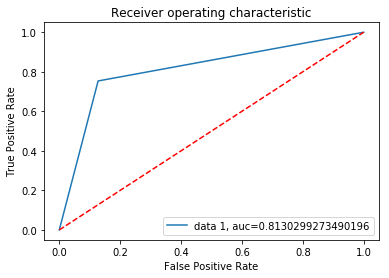

In [68]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("AUC :",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## 6.6.2 Boosting

# 6.6.2.1 GradientBoosting

A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.

In [69]:
%%time
learning_rate_ = [.01,.05,.1,.5,1]
n_estimators_ = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_, n_estimators=n_estimators_)

GB = GradientBoostingClassifier()

GB_GridSearch = RandomSearch(X_train, y_train, GB, param_grid)


CPU times: user 129 µs, sys: 0 ns, total: 129 µs
Wall time: 135 µs


In [70]:
Prediction_GB = GB_GridSearch.Best_Model_Predict(X_test)

Best: 0.833971 using {'n_estimators': 250, 'learning_rate': 0.1}


In [74]:
from xgboost import XGBClassifier
%%time

learning_rate_ = [.01,.05,.1,.5,1]
n_estimators_ = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_, n_estimators=n_estimators_,n_jobs=-1)

GB =  XGBClassifier()

GB_GridSearch = RandomSearch(X_train, y_train, GB, param_grid)
Prediction_GB = GB_GridSearch.Best_Model_Predict(X_test)

UsageError: Line magic function `%%time` not found.


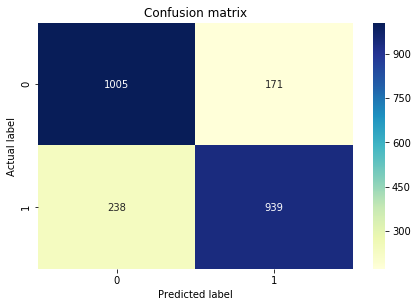

Accuracy: 0.8261793455163621
Precision: 0.845945945945946
Recall: 0.7977909940526763
F1 score: 0.8211630957586359
AUC : 0.826191415393685


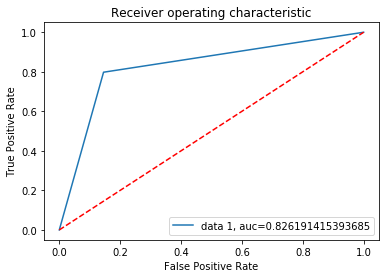

In [75]:
cf_matrix = confusion_matrix(y_test, Prediction_GB)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, Prediction_GB))
print("Precision:",metrics.precision_score(y_test, Prediction_GB))
print("Recall:",metrics.recall_score(y_test, Prediction_GB))
print("F1 score:",metrics.f1_score(y_test, Prediction_GB))
print("AUC :",metrics.roc_auc_score(y_test, Prediction_GB))


fpr, tpr, _ = metrics.roc_curve(y_test,  Prediction_GB)
auc = metrics.roc_auc_score(y_test, Prediction_GB)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
#.712

# 7. Neural Network

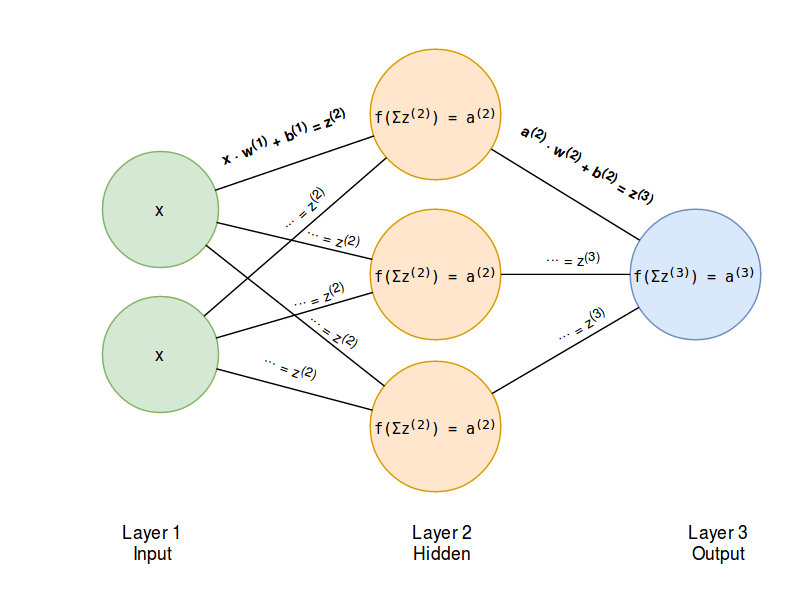

**The Sequential model is a linear stack of layers.**

**Specifying the input shape**

    The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
    
**Compilation**

Before training a model, we need to configure the learning process, which is done via the compile method. It receives three arguments:

    An optimizer. 
    This could be the string identifier of an existing optimizer (such as rmsprop , adam or adagrad).
    
    A loss function. 
    This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. 
    
    A list of metrics.
    For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

**Training**

    Keras models are trained on Numpy arrays of input data and labels. For training a model,we will use the fit function.

In [77]:
%%time
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(output_dim = 16, activation = 'relu', input_dim = 46))
# Adding the second hidden layer
model.add(Dense(output_dim = 8,  activation = 'relu'))

# Adding the output layer
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

y_pred1 = model.predict(X_test)
y_pred1 = (y_pred1 > 0.5)



Epoch 1/100
13329/13329 [==============================] - 2s 153us/step - loss: 0.4747 - accuracy: 0.7653
Epoch 2/100
13329/13329 [==============================] - 2s 135us/step - loss: 0.4186 - accuracy: 0.8021
Epoch 3/100
13329/13329 [==============================] - 2s 136us/step - loss: 0.4049 - accuracy: 0.8085
Epoch 4/100
13329/13329 [==============================] - 2s 137us/step - loss: 0.3967 - accuracy: 0.8112
Epoch 5/100
13329/13329 [==============================] - 2s 134us/step - loss: 0.3917 - accuracy: 0.8167
Epoch 6/100
13329/13329 [==============================] - 2s 135us/step - loss: 0.3877 - accuracy: 0.8172
Epoch 7/100
13329/13329 [==============================] - 2s 136us/step - loss: 0.3868 - accuracy: 0.8188
Epoch 8/100
13329/13329 [==============================] - 2s 133us/step - loss: 0.3847 - accuracy: 0.8184
Epoch 9/100
13329/13329 [==============================] - 2s 136us/step - loss: 0.3821 - accuracy: 0.8190
Epoch 10/100
13329/13329 [===========

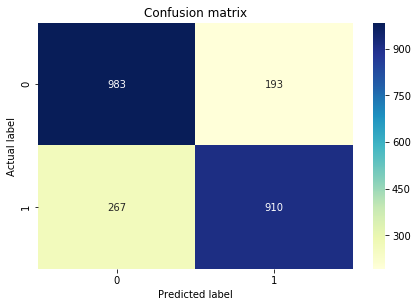

Accuracy: 0.8045048873778156
Precision: 0.8250226654578422
Recall: 0.7731520815632965
F1 score: 0.7982456140350876
AUC : 0.8045182176523966


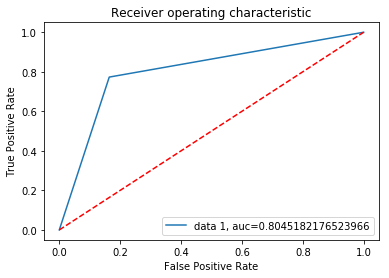

In [78]:
cf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("F1 score:",metrics.f1_score(y_test, y_pred1))
print("AUC :",metrics.roc_auc_score(y_test, y_pred1))


fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [79]:

m = { 
"GradientBoosting" : {
    "Accuracy": 0.8280,
    "Precision": 0.84150,
    "Recall": 0.8063,
    "F1 score": 0.82352,
    "AUC" : 0.82795,
    "RunTime(sec)" : 481
    },
"Random Forest" : {
    "Accuracy": 0.82064,
    "Precision": 0.86139,
    "Recall": 0.76217,
    "F1 score": 0.80875,
    "AUC" : 0.8203,
    "RunTime(sec)" : 59.4
    },
"LDA" : {
    "Accuracy": 0.8001,
    "Precision": 0.8307,
    "Recall": 0.7512,
    "F1 score": 0.7890,
    "AUC" : 0.7998,
    "RunTime(sec)" : 1.2
    },
"Decision Tree" : {
    "Accuracy": 0.7992,
    "Precision": 0.8607,
    "Recall": 0.7117,
    "F1 score": 0.7791,
    "AUC" : 0.7988,
    "RunTime(sec)" : 2.1
    },
"SVM" : {
    "Accuracy": 0.8066,
    "Precision": 0.8592,
    "Recall": 0.7312,
    "F1 score": 0.7900,
    "AUC" : 0.8063,
    "RunTime(sec)" : 500.4
    },
"KNN" : {
    "Accuracy": 0.7924,
    "Precision": 0.8212,
    "Recall": 0.74498,
    "F1 score": 0.7812,
    "AUC" : 0.7921,
    "RunTime(sec)" : 144.1
    },
"LR(ET)" : {
    "Accuracy": 0.8069,
    "Precision": 0.8156,
    "Recall": 0.7908,
    "F1 score": 0.8030,
    "AUC" : 0.80687,
    "RunTime(sec)" : .688
    },
"LR(PCA)" : {
    "Accuracy": 0.7866,
    "Precision": 0.8162,
    "Recall": 0.7492,
    "F1 score": 0.7813,
    "AUC" : 0.7872,
    "RunTime(sec)" : .433
    },
"LR(REF)" : {
    "Accuracy": 0.7984,
    "Precision": 0.8409,
    "Recall": 0.7335,
    "F1 score":0.7835,
    "AUC" : 0.7980,
    "RunTime(sec)" : 1.7
    },
"LR(GridSearch)" : {
    "Accuracy": 0.81636,
    "Precision": 0.8270,
    "Recall": 0.7977,
    "F1 score": 0.8121,
    "AUC" : 0.8162,
    "RunTime(sec)" : 23.8
    },
"LR(RandomSearch)":{
    "Accuracy": 0.8120,
    "Precision": 0.8302,
    "Recall": 0.7822,
    "F1 score": 0.8055,
    "AUC" : 0.8119,
    "RunTime(sec)" : 4.9
    },
"Neural Network" : {
    "Accuracy": 0.8157,
    "Precision": 0.8466,
    "Recall": 0.76905,
    "F1 score": 0.7707,
    "AUC" : 0.8155,
    "RunTime(sec)" : 120
    },
}
df = pd.DataFrame(m)
df.T


,Accuracy,Precision,Recall,F1 score,AUC,RunTime(sec)
GradientBoosting,0.82800,0.84150,0.80630,0.82352,0.82795,481.000
Random Forest,0.82064,0.86139,0.76217,0.80875,0.82030,59.400
LDA,0.80010,0.83070,0.75120,0.78900,0.79980,1.200
Decision Tree,0.79920,0.86070,0.71170,0.77910,0.79880,2.100
SVM,0.80660,0.85920,0.73120,0.79000,0.80630,500.400
KNN,0.79240,0.82120,0.74498,0.78120,0.79210,144.100
LR(ET),0.80690,0.81560,0.79080,0.80300,0.80687,0.688
LR(PCA),0.78660,0.81620,0.74920,0.78130,0.78720,0.433
LR(REF),0.79840,0.84090,0.73350,0.78350,0.79800,1.700
LR(GridSearch),0.81636,0.82700,0.79770,0.81210,0.81620,23.800


# Summary

I have choosen two performance criterion for models:
1. Model Accuracy
2. Run time

#### 1. Model Accuracy

**GradientBoosting** outperform all the models if we take accuracy under consideration.It has 82.7% accuracy. But it takes nearly 481 sec (8 min) to pick the hyperparameters, train the model and predict the output.

There is another way to reduce the runtime by a factor of 8 without losing much accuracy if we use Random Forest for modelling.
**Random Forest** has accuracy 82% but it has nearly 1 min runtime.

#### 2. Run time

In case if our focus is on runtime then **Logistic Regression** has runtime 4.9 sec with accuracy 81.1%.

But if we want lowest runtime, we have to diminishing the accuracy. In that case **LDA** is the best choice with nearly 80% accuracy and 1.2 sec of runtime.

**The results obtained above can be used as a standard point of reference for other comparative studies done in the field of predicting values from census data. This comparative study can further be used as a basis for improving the present classifiers and techniques resulting in making better technologies for accurately predicting income level of an individual.**